## 1. Import Libraries and Datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,auc,roc_curve

import pickle
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [74]:
reviews=pd.read_csv(r'E:\Internships\AI and ML SmartInternz Externship\AIRLINE REVIEW CLASSIFICATION\Airline_Reviews.csv')
reviews.head()

,Unnamed: 0,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended
0,0,AB Aviation,9,"""pretty decent airline""",11th November 2019,True,Moroni to Moheli. Turned out to be a pretty ...,NaN,Solo Leisure,Economy Class,Moroni to Moheli,November 2019,4.0,5.0,4.0,4.0,NaN,NaN,3.0,yes
1,1,AB Aviation,1,"""Not a good airline""",25th June 2019,True,Moroni to Anjouan. It is a very small airline...,E120,Solo Leisure,Economy Class,Moroni to Anjouan,June 2019,2.0,2.0,1.0,1.0,NaN,NaN,2.0,no
2,2,AB Aviation,1,"""flight was fortunately short""",25th June 2019,True,Anjouan to Dzaoudzi. A very small airline an...,Embraer E120,Solo Leisure,Economy Class,Anjouan to Dzaoudzi,June 2019,2.0,1.0,1.0,1.0,NaN,NaN,2.0,no
3,3,Adria Airways,1,"""I will never fly again with Adria""",28th September 2019,False,Please do a favor yourself and do not fly wi...,NaN,Solo Leisure,Economy Class,Frankfurt to Pristina,September 2019,1.0,1.0,NaN,1.0,NaN,NaN,1.0,no
4,4,Adria Airways,1,"""it ruined our last days of holidays""",24th September 2019,True,Do not book a flight with this airline! My fr...,NaN,Couple Leisure,Economy Class,Sofia to Amsterdam via Ljubljana,September 2019,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no


In [3]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23171 entries, 0 to 23170
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              23171 non-null  int64  
 1   Airline Name            23171 non-null  object 
 2   Overall_Rating          23171 non-null  object 
 3   Review_Title            23171 non-null  object 
 4   Review Date             23171 non-null  object 
 5   Verified                23171 non-null  bool   
 6   Review                  23171 non-null  object 
 7   Aircraft                7129 non-null   object 
 8   Type Of Traveller       19433 non-null  object 
 9   Seat Type               22075 non-null  object 
 10  Route                   19343 non-null  object 
 11  Date Flown              19417 non-null  object 
 12  Seat Comfort            19016 non-null  float64
 13  Cabin Staff Service     18911 non-null  float64
 14  Food & Beverages        14500 non-null

In [4]:
reviews.shape

(23171, 20)

## 2. Data Preprocessing

#### Handling NULL Values

In [5]:
reviews.isnull().any()

Unnamed: 0                False
Airline Name              False
Overall_Rating            False
Review_Title              False
Review Date               False
Verified                  False
Review                    False
Aircraft                   True
Type Of Traveller          True
Seat Type                  True
Route                      True
Date Flown                 True
Seat Comfort               True
Cabin Staff Service        True
Food & Beverages           True
Ground Service             True
Inflight Entertainment     True
Wifi & Connectivity        True
Value For Money            True
Recommended               False
dtype: bool

In [6]:
reviews.isnull().sum()

Unnamed: 0                    0
Airline Name                  0
Overall_Rating                0
Review_Title                  0
Review Date                   0
Verified                      0
Review                        0
Aircraft                  16042
Type Of Traveller          3738
Seat Type                  1096
Route                      3828
Date Flown                 3754
Seat Comfort               4155
Cabin Staff Service        4260
Food & Beverages           8671
Ground Service             4793
Inflight Entertainment    12342
Wifi & Connectivity       17251
Value For Money            1066
Recommended                   0
dtype: int64

Dropping the Unnecessary Columns

In [7]:
reviews.drop(['Inflight Entertainment','Wifi & Connectivity','Aircraft',
              'Cabin Staff Service','Unnamed: 0','Review Date','Review_Title','Review'],axis=1,inplace=True)

In [8]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23171 entries, 0 to 23170
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Airline Name       23171 non-null  object 
 1   Overall_Rating     23171 non-null  object 
 2   Verified           23171 non-null  bool   
 3   Type Of Traveller  19433 non-null  object 
 4   Seat Type          22075 non-null  object 
 5   Route              19343 non-null  object 
 6   Date Flown         19417 non-null  object 
 7   Seat Comfort       19016 non-null  float64
 8   Food & Beverages   14500 non-null  float64
 9   Ground Service     18378 non-null  float64
 10  Value For Money    22105 non-null  float64
 11  Recommended        23171 non-null  object 
dtypes: bool(1), float64(4), object(7)
memory usage: 2.0+ MB


In [9]:
reviews.isnull().sum()

Airline Name            0
Overall_Rating          0
Verified                0
Type Of Traveller    3738
Seat Type            1096
Route                3828
Date Flown           3754
Seat Comfort         4155
Food & Beverages     8671
Ground Service       4793
Value For Money      1066
Recommended             0
dtype: int64

In [10]:
reviews['Overall_Rating'].value_counts()

Overall_Rating
1    11595
2     2296
9     1768
8     1757
3     1356
7     1192
4      859
n      842
5      830
6      676
Name: count, dtype: int64

In [11]:
reviews['Overall_Rating']=reviews['Overall_Rating'].replace(['1','2','3','4','5','6','7','8','9','n'],
                                                            ['1','2','3','4','5','6','7','8','9','10'])

In [12]:
reviews['Overall_Rating'].value_counts()

Overall_Rating
1     11595
2      2296
9      1768
8      1757
3      1356
7      1192
4       859
10      842
5       830
6       676
Name: count, dtype: int64

In [13]:
reviews['Type Of Traveller']=reviews['Type Of Traveller'].fillna(reviews['Type Of Traveller'].mode()[0])
reviews['Seat Type']=reviews['Seat Type'].fillna(reviews['Seat Type'].mode()[0])
reviews['Route']=reviews['Route'].fillna(reviews['Route'].mode()[0])
reviews['Date Flown']=reviews['Date Flown'].fillna(reviews['Date Flown'].mode()[0])
reviews['Seat Comfort']=reviews['Seat Comfort'].fillna(reviews['Seat Comfort'].mode()[0])
reviews['Food & Beverages']=reviews['Food & Beverages'].fillna(reviews['Food & Beverages'].mode()[0])
reviews['Ground Service']=reviews['Ground Service'].fillna(reviews['Ground Service'].mode()[0])
reviews['Value For Money']=reviews['Value For Money'].fillna(reviews['Value For Money'].mode()[0])

In [14]:
reviews.isnull().any()

Airline Name         False
Overall_Rating       False
Verified             False
Type Of Traveller    False
Seat Type            False
Route                False
Date Flown           False
Seat Comfort         False
Food & Beverages     False
Ground Service       False
Value For Money      False
Recommended          False
dtype: bool

#### Breaking Columns into sub-columns

In [15]:
reviews[['Month Flown','Year Flown']]=reviews['Date Flown'].str.split(expand=True)

In [16]:
reviews.isnull().any()

Airline Name         False
Overall_Rating       False
Verified             False
Type Of Traveller    False
Seat Type            False
Route                False
Date Flown           False
Seat Comfort         False
Food & Beverages     False
Ground Service       False
Value For Money      False
Recommended          False
Month Flown          False
Year Flown           False
dtype: bool

In [17]:
reviews['Origin']=reviews['Route'].str.split(' to ',expand=True)[0]
reviews['Destination']=reviews['Route'].str.split(' to ',expand=True)[1]

## Removing the via city
reviews['Destination']=reviews['Destination'].str.split(' via ',expand=True)[0]

In [18]:
reviews.drop(['Route','Date Flown'],axis=1,inplace=True)
reviews.head()

,Airline Name,Overall_Rating,Verified,Type Of Traveller,Seat Type,Seat Comfort,Food & Beverages,Ground Service,Value For Money,Recommended,Month Flown,Year Flown,Origin,Destination
0,AB Aviation,9,True,Solo Leisure,Economy Class,4.0,4.0,4.0,3.0,yes,November,2019,Moroni,Moheli
1,AB Aviation,1,True,Solo Leisure,Economy Class,2.0,1.0,1.0,2.0,no,June,2019,Moroni,Anjouan
2,AB Aviation,1,True,Solo Leisure,Economy Class,2.0,1.0,1.0,2.0,no,June,2019,Anjouan,Dzaoudzi
3,Adria Airways,1,False,Solo Leisure,Economy Class,1.0,1.0,1.0,1.0,no,September,2019,Frankfurt,Pristina
4,Adria Airways,1,True,Couple Leisure,Economy Class,1.0,1.0,1.0,1.0,no,September,2019,Sofia,Amsterdam


In [19]:
reviews.isnull().sum()

Airline Name          0
Overall_Rating        0
Verified              0
Type Of Traveller     0
Seat Type             0
Seat Comfort          0
Food & Beverages      0
Ground Service        0
Value For Money       0
Recommended           0
Month Flown           0
Year Flown            0
Origin                0
Destination          38
dtype: int64

In [20]:
## Dropping Irregular Destination Records
reviews.dropna(axis=0,inplace=True)

In [21]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23133 entries, 0 to 23170
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Airline Name       23133 non-null  object 
 1   Overall_Rating     23133 non-null  object 
 2   Verified           23133 non-null  bool   
 3   Type Of Traveller  23133 non-null  object 
 4   Seat Type          23133 non-null  object 
 5   Seat Comfort       23133 non-null  float64
 6   Food & Beverages   23133 non-null  float64
 7   Ground Service     23133 non-null  float64
 8   Value For Money    23133 non-null  float64
 9   Recommended        23133 non-null  object 
 10  Month Flown        23133 non-null  object 
 11  Year Flown         23133 non-null  object 
 12  Origin             23133 non-null  object 
 13  Destination        23133 non-null  object 
dtypes: bool(1), float64(4), object(9)
memory usage: 2.5+ MB


In [22]:
## Reordering the Columns

cols=['Airline Name','Seat Type','Type Of Traveller','Origin','Destination','Month Flown','Year Flown',
      'Verified','Seat Comfort','Food & Beverages','Ground Service','Overall_Rating','Value For Money','Recommended']
reviews=reviews.reindex(columns=cols)

In [23]:
reviews.head()

,Airline Name,Seat Type,Type Of Traveller,Origin,Destination,Month Flown,Year Flown,Verified,Seat Comfort,Food & Beverages,Ground Service,Overall_Rating,Value For Money,Recommended
0,AB Aviation,Economy Class,Solo Leisure,Moroni,Moheli,November,2019,True,4.0,4.0,4.0,9,3.0,yes
1,AB Aviation,Economy Class,Solo Leisure,Moroni,Anjouan,June,2019,True,2.0,1.0,1.0,1,2.0,no
2,AB Aviation,Economy Class,Solo Leisure,Anjouan,Dzaoudzi,June,2019,True,2.0,1.0,1.0,1,2.0,no
3,Adria Airways,Economy Class,Solo Leisure,Frankfurt,Pristina,September,2019,False,1.0,1.0,1.0,1,1.0,no
4,Adria Airways,Economy Class,Couple Leisure,Sofia,Amsterdam,September,2019,True,1.0,1.0,1.0,1,1.0,no


#### Handling Categorical Values

In [24]:
from sklearn.preprocessing import LabelEncoder
le1=LabelEncoder()
le2=LabelEncoder()
le3=LabelEncoder()
le4=LabelEncoder()
le5=LabelEncoder()
le6=LabelEncoder()
le7=LabelEncoder()
le8=LabelEncoder()
le9=LabelEncoder()
le10=LabelEncoder()

In [25]:
reviews['Airline Name']=le1.fit_transform(reviews['Airline Name'])
reviews['Seat Type']=le2.fit_transform(reviews['Seat Type'])
reviews['Type Of Traveller']=le3.fit_transform(reviews['Type Of Traveller'])
reviews['Origin']=le4.fit_transform(reviews['Origin'])
reviews['Destination']=le5.fit_transform(reviews['Destination'])
reviews['Month Flown']=le6.fit_transform(reviews['Month Flown'])
reviews['Year Flown']=le7.fit_transform(reviews['Year Flown'])
reviews['Verified']=le8.fit_transform(reviews['Verified'])
reviews['Overall_Rating']=le9.fit_transform(reviews['Overall_Rating'])
reviews['Recommended']=le10.fit_transform(reviews['Recommended'])

In [26]:
reviews.head()

,Airline Name,Seat Type,Type Of Traveller,Origin,Destination,Month Flown,Year Flown,Verified,Seat Comfort,Food & Beverages,Ground Service,Overall_Rating,Value For Money,Recommended
0,0,1,3,1265,1545,9,6,1,4.0,4.0,4.0,9,3.0,1
1,0,1,3,1265,107,6,6,1,2.0,1.0,1.0,0,2.0,0
2,0,1,3,79,672,6,6,1,2.0,1.0,1.0,0,2.0,0
3,4,1,3,626,1927,11,6,0,1.0,1.0,1.0,0,1.0,0
4,4,1,1,1820,99,11,6,1,1.0,1.0,1.0,0,1.0,0


## 3. Exploratory Data Analysis

In [27]:
reviews.describe()

,Airline Name,Seat Type,Type Of Traveller,Origin,Destination,Month Flown,Year Flown,Verified,Seat Comfort,Food & Beverages,Ground Service,Overall_Rating,Value For Money,Recommended
count,23133.000000,23133.000000,23133.000000,23133.000000,23133.000000,23133.000000,23133.000000,23133.000000,23133.000000,23133.000000,23133.000000,23133.000000,23133.000000,23133.000000
mean,244.902045,0.973112,2.009294,1067.187222,1451.709030,5.493926,7.705875,0.531751,2.326806,1.971858,2.072926,2.565729,2.383392,0.336705
std,144.140686,0.457387,1.077392,555.129843,800.533375,3.018721,2.511677,0.499002,1.464482,1.422149,1.522697,3.234985,1.586008,0.472593
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,124.000000,1.000000,1.000000,613.000000,726.000000,3.000000,6.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
50%,237.000000,1.000000,2.000000,1215.000000,1494.000000,6.000000,9.000000,1.000000,2.000000,1.000000,1.000000,0.000000,2.000000,0.000000
75%,373.000000,1.000000,3.000000,1392.000000,2343.000000,7.000000,10.000000,1.000000,4.000000,3.000000,3.000000,5.000000,4.000000,1.000000
max,495.000000,3.000000,3.000000,2160.000000,2691.000000,11.000000,10.000000,1.000000,5.000000,5.000000,5.000000,9.000000,5.000000,1.000000


[Text(0.5, 0, 'Index')]

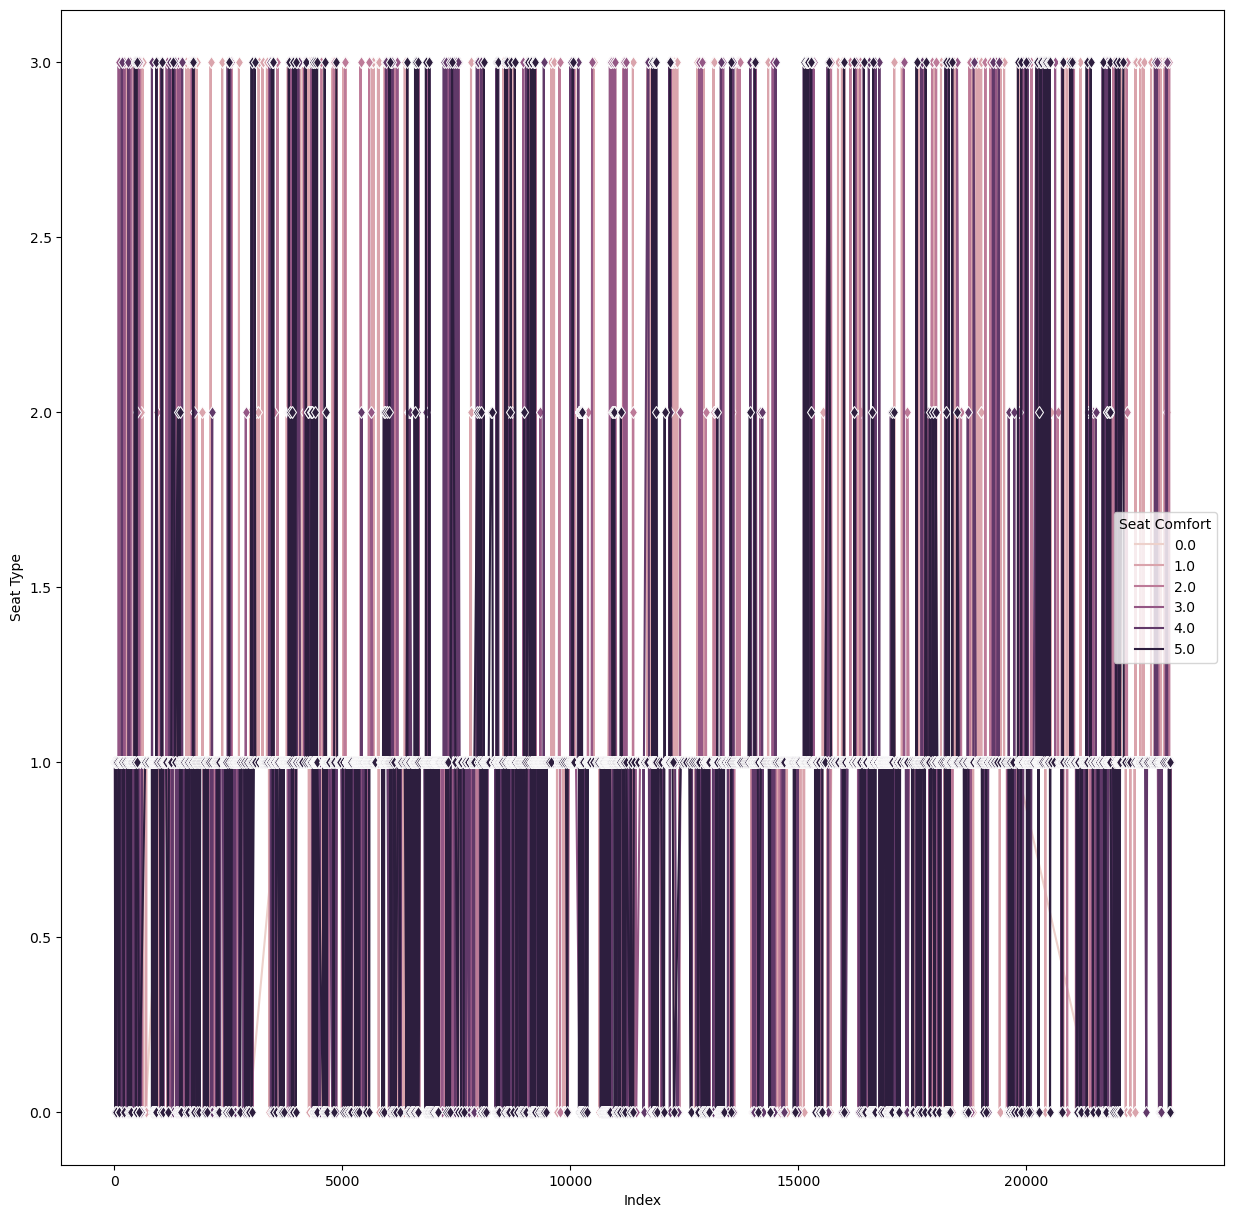

In [28]:
## Line Plot in Seaborn

plt.figure(figsize=(15,15))
fig=sns.lineplot(x=reviews.index,y=reviews['Seat Type'],markevery=1,marker='d',hue=reviews['Seat Comfort'])
fig.set(xlabel='Index')

<Axes: xlabel='Seat Type'>

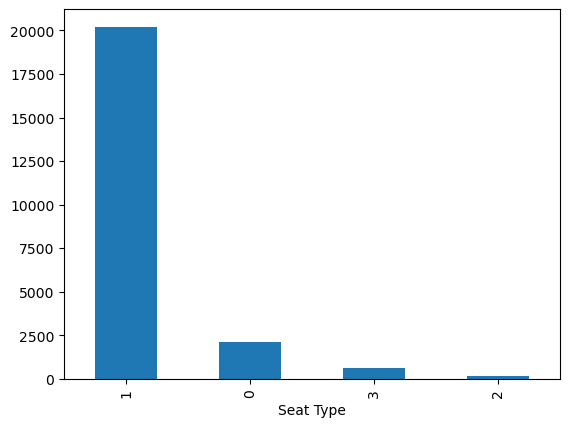

In [29]:
reviews['Seat Type'].value_counts().plot.bar()

([<matplotlib.patches.Wedge at 0x217c0dc0610>,
 [Text(-0.4254159284561233, -1.0144068650279408, 'EC'),
  Text(0.5366864827143649, 0.9601914492806546, 'BC'),
  Text(0.15099934014841118, 1.0895867103056758, 'PE'),
  Text(0.027633534524320345, 1.0996528487525932, 'FC')],
 [Text(-0.23204505188515814, -0.5533128354697857, '87.360'),
  Text(0.29273808148056263, 0.5237407905167206, '9.056'),
  Text(0.08236327644458791, 0.5943200238030958, '2.784'),
  Text(0.01507283701326564, 0.5998106447741416, '0.800')])

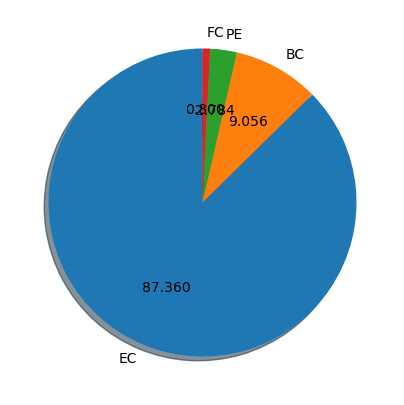

In [30]:
plt.figure(figsize=(5,5))
plt.pie(reviews['Seat Type'].value_counts(),startangle=90,autopct='%.3f',
       labels=['EC','BC','PE','FC'],shadow=True)

<Axes: xlabel='Type Of Traveller', ylabel='Overall_Rating'>

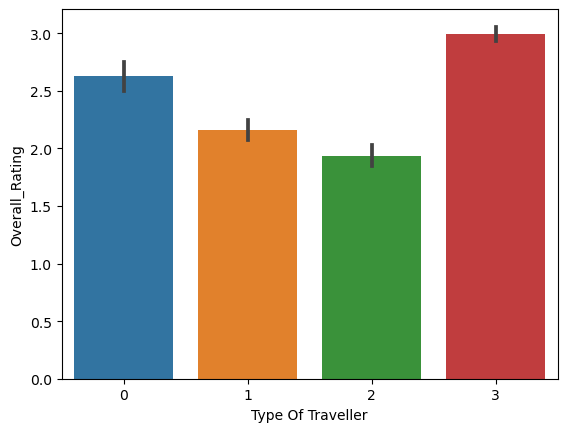

In [31]:
sns.barplot(data=reviews,x='Type Of Traveller',y='Overall_Rating')

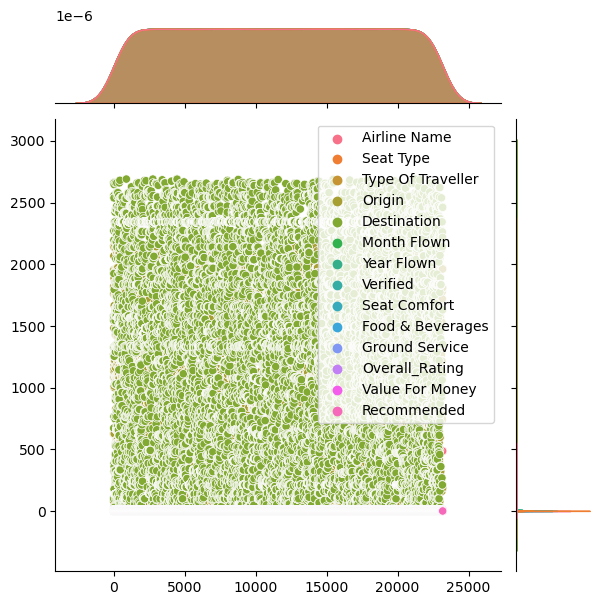

In [32]:
sns.jointplot(reviews)

<Axes: >

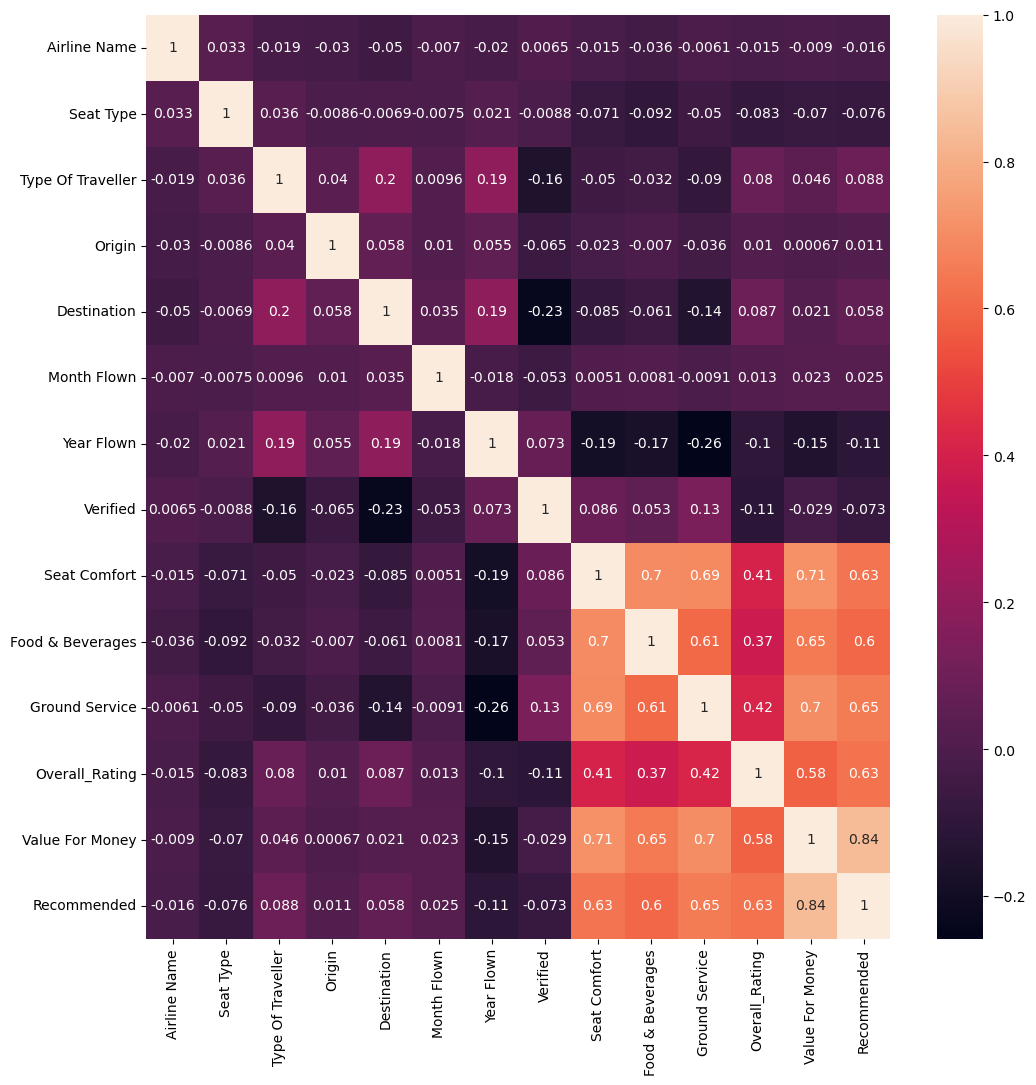

In [33]:
plt.figure(figsize=(12,12))
sns.heatmap(reviews.corr(),annot=True)

## 4. Model Building

#### Splitting Data into Training and Testing Data
    From the heatmap showing the correlation it is clear that the columns ['Airline Name','Seat Type',
    'Type of Traveller','Origin','Destination','Month Flown','Year Flown','Verified'] has very low correlation 
    and thus can be dropped from the training.

In [35]:
X=reviews.iloc[:,8:13].values
y=reviews.iloc[:,13:14].values

In [36]:
X

array([[4., 4., 4., 9., 3.],
       [2., 1., 1., 0., 2.],
       [2., 1., 1., 0., 2.],
       ...,
       [2., 2., 1., 3., 2.],
       [3., 3., 1., 6., 5.],
       [1., 1., 1., 0., 1.]])

In [37]:
y

array([[1],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [38]:
## As the values are imbalanced and have over sampling, we use SMOTE
smote=SMOTE(sampling_strategy='auto',random_state=50)

In [39]:
X,y=smote.fit_resample(X,y)

In [40]:
np.count_nonzero(y==1)

15344

In [41]:
np.count_nonzero(y==0)

15344

In [42]:
ss=StandardScaler()
X=ss.fit_transform(X)

In [43]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [73]:
## Saving the Scaling file
pickle.dump(ss,open('ar_ss.pkl','wb'))

## 5. Training and Testing of Model

### 1. Decision Tree

In [45]:
dtc=DecisionTreeClassifier(criterion='entropy',random_state=50)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=50)

In [46]:
pred_dtc=dtc.predict(X_test)
pred_dtc

array([0, 1, 1, ..., 0, 1, 1])

In [47]:
fpr_dt,tpr_dt,thres_dt=roc_curve(y_test,pred_dtc)
roc_auc_dt=auc(fpr_dt,tpr_dt)

print(classification_report(y_test,pred_dtc))

print('ROC AUC DTC= ',roc_auc_dt)

cm_dt=confusion_matrix(y_test,pred_dtc)
print('Confusion Matrix DTC: ')
print(cm_dt)

as_dt=accuracy_score(y_test,pred_dtc)
print('Accuracy DTC: ',as_dt)

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      3102
           1       0.97      0.96      0.97      3036

    accuracy                           0.97      6138
   macro avg       0.97      0.97      0.97      6138
weighted avg       0.97      0.97      0.97      6138

ROC AUC DTC=  0.9667220306674515
Confusion Matrix DTC: 
[[3011   91]
 [ 113 2923]]
Accuracy DTC:  0.9667644183773216


### 2. K Nearest Neighbors

In [48]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [49]:
pred_knn=knn.predict(X_test)
pred_knn

array([0, 1, 1, ..., 0, 1, 1])

In [50]:
fpr_knn,tpr_knn,thres_knn=roc_curve(y_test,pred_knn)
roc_auc_knn=auc(fpr_knn,tpr_knn)

print(classification_report(y_test,pred_knn))

print('ROC AUC KNN= ',roc_auc_knn)

cm_knn=confusion_matrix(y_test,pred_knn)
print('Confusion Matrix KNN: ')
print(cm_knn)

as_knn=accuracy_score(y_test,pred_knn)
print('Accuracy KNN: ',as_knn)

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      3102
           1       0.96      0.97      0.96      3036

    accuracy                           0.96      6138
   macro avg       0.96      0.96      0.96      6138
weighted avg       0.96      0.96      0.96      6138

ROC AUC KNN=  0.9649735093768397
Confusion Matrix KNN: 
[[2993  109]
 [ 106 2930]]
Accuracy KNN:  0.9649723036819811


### 3. Logistic Regression

In [51]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [52]:
pred_lr=lr.predict(X_test)
pred_lr

array([0, 1, 1, ..., 0, 1, 1])

In [53]:
fpr_lr,tpr_lr,thres_lr=roc_curve(y_test,pred_lr)
roc_auc_lr=auc(fpr_lr,tpr_lr)

print(classification_report(y_test,pred_lr))

print('ROC AUC LR= ',roc_auc_lr)

cm_lr=confusion_matrix(y_test,pred_lr)
print('Confusion Matrix LR: ')
print(cm_lr)

as_lr=accuracy_score(y_test,pred_lr)
print('Accuracy LR: ',as_lr)

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      3102
           1       0.92      0.93      0.93      3036

    accuracy                           0.93      6138
   macro avg       0.93      0.93      0.93      6138
weighted avg       0.93      0.93      0.93      6138

ROC AUC LR=  0.9257316457825246
Confusion Matrix LR: 
[[2865  237]
 [ 219 2817]]
Accuracy LR:  0.9257086999022482


### 4. Naive Bayes Classifier

In [54]:
gnb=GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [55]:
pred_gnb=gnb.predict(X_test)
pred_gnb

array([0, 1, 1, ..., 0, 1, 1])

In [56]:
fpr_gnb,tpr_gnb,thres_gnb=roc_curve(y_test,pred_gnb)
roc_auc_gnb=auc(fpr_gnb,tpr_gnb)

print(classification_report(y_test,pred_gnb))

print('ROC AUC GNB= ',roc_auc_gnb)

cm_gnb=confusion_matrix(y_test,pred_gnb)
print('Confusion Matrix GNB: ')
print(cm_gnb)

as_gnb=accuracy_score(y_test,pred_gnb)
print('Accuracy GNB: ',as_gnb)

              precision    recall  f1-score   support

           0       0.94      0.91      0.92      3102
           1       0.91      0.94      0.92      3036

    accuracy                           0.92      6138
   macro avg       0.92      0.92      0.92      6138
weighted avg       0.92      0.92      0.92      6138

ROC AUC GNB=  0.9227637148543716
Confusion Matrix GNB: 
[[2819  283]
 [ 192 2844]]
Accuracy GNB:  0.922613229064842


### 5. Random Forest Classifier

In [57]:
rf=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=2)
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=2)

In [58]:
pred_rf=rf.predict(X_test)
pred_rf

array([0, 1, 1, ..., 0, 1, 1])

In [59]:
fpr_rf,tpr_rf,thres_rf=roc_curve(y_test,pred_rf)
roc_auc_rf=auc(fpr_rf,tpr_rf)

print(classification_report(y_test,pred_rf))

print('ROC AUC RF= ',roc_auc_rf)

cm_rf=confusion_matrix(y_test,pred_rf)
print('Confusion Matrix RF: ')
print(cm_rf)

as_rf=accuracy_score(y_test,pred_rf)
print('Accuracy RF: ',as_rf)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3102
           1       0.97      0.97      0.97      3036

    accuracy                           0.97      6138
   macro avg       0.97      0.97      0.97      6138
weighted avg       0.97      0.97      0.97      6138

ROC AUC RF=  0.967724189162672
Confusion Matrix RF: 
[[3007   95]
 [ 103 2933]]
Accuracy RF:  0.967741935483871


### 6. Support Vector Machine

In [60]:
svc=SVC()
svc.fit(X_train,y_train)

SVC()

In [61]:
pred_svc=svc.predict(X_test)
pred_svc

array([0, 1, 1, ..., 0, 1, 1])

In [62]:
fpr_svc,tpr_svc,thres_svc=roc_curve(y_test,pred_svc)
roc_auc_svc=auc(fpr_svc,tpr_svc)

print(classification_report(y_test,pred_svc))

print('ROC AUC SVC= ',roc_auc_svc)

cm_svc=confusion_matrix(y_test,pred_svc)
print('Confusion Matrix SVC: ')
print(cm_svc)

as_svc=accuracy_score(y_test,pred_svc)
print('Accuracy SVC: ',as_svc)

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      3102
           1       0.96      0.97      0.96      3036

    accuracy                           0.96      6138
   macro avg       0.96      0.96      0.96      6138
weighted avg       0.96      0.96      0.96      6138

ROC AUC SVC=  0.963203963782132
Confusion Matrix SVC: 
[[2981  121]
 [ 105 2931]]
Accuracy SVC:  0.9631801889866406


### 7. XG Boost

In [63]:
xgb=XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [64]:
pred_xgb=xgb.predict(X_test)
pred_xgb

array([0, 1, 1, ..., 0, 1, 1])

In [65]:
fpr_xgb,tpr_xgb,thres_xgb=roc_curve(y_test,pred_xgb)
roc_auc_xgb=auc(fpr_xgb,tpr_xgb)

print(classification_report(y_test,pred_xgb))

print('ROC AUC XGB= ',roc_auc_xgb)

cm_xgb=confusion_matrix(y_test,pred_xgb)
print('Confusion Matrix XGB: ')
print(cm_xgb)

as_xgb=accuracy_score(y_test,pred_xgb)
print('Accuracy XGB: ',as_xgb)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3102
           1       0.97      0.97      0.97      3036

    accuracy                           0.97      6138
   macro avg       0.97      0.97      0.97      6138
weighted avg       0.97      0.97      0.97      6138

ROC AUC XGB=  0.9708638185742718
Confusion Matrix XGB: 
[[3004   98]
 [  81 2955]]
Accuracy XGB:  0.9708374063212772


##### XG Boost has the best Performance

## 6. Finding the Model with Best Performance

In [66]:
algo=pd.DataFrame({'Model':['Desicion Tree Classifier','K Nearest Neighbors','Logistic Regression',
                           'Naive Bayes Classifier','Random Forest Classifier','Support Vector Machine','XG Boost'],
                   'ROC AUC':[roc_auc_dt, roc_auc_knn, roc_auc_lr, roc_auc_gnb, roc_auc_rf, roc_auc_svc, roc_auc_xgb],
                   'ACCURACY':[as_dt, as_knn, as_lr, as_gnb, as_rf, as_svc, as_xgb]
                  })

In [67]:
algo

,Model,ROC AUC,ACCURACY
0,Desicion Tree Classifier,0.966722,0.966764
1,K Nearest Neighbors,0.964974,0.964972
2,Logistic Regression,0.925732,0.925709
3,Naive Bayes Classifier,0.922764,0.922613
4,Random Forest Classifier,0.967724,0.967742
5,Support Vector Machine,0.963204,0.963180
6,XG Boost,0.970864,0.970837


In [68]:
Max1=0
mod1=''
Max2=0
mod2=''
for i in range(len(algo['Model'])):
    if algo.iloc[i:i+1,1:2].values>Max1:
        Max1=algo.iloc[i:i+1,1:2].values
        mod1=algo.iloc[i:i+1,0:1].values
    if algo.iloc[i:i+1,2:3].values>Max2:
        Max2=algo.iloc[i:i+1,2:3].values
        mod2=algo.iloc[i:i+1,0:1].values
print("Best ROC-AUC is ",Max1," by ",mod1)
print("Best ACCURACY is ",Max2," by ",mod2)

Best ROC-AUC is  [[0.97086382]]  by  [['XG Boost']]
Best ACCURACY is  [[0.97083741]]  by  [['XG Boost']]


## 7. Save the Model

In [71]:
pickle.dump(xgb,open('ar_xgb.pkl','wb'))

In [72]:
pickle.dump(le1,open('le1.pkl','wb'))
pickle.dump(le2,open('le2.pkl','wb'))
pickle.dump(le3,open('le3.pkl','wb'))
pickle.dump(le4,open('le4.pkl','wb'))
pickle.dump(le5,open('le5.pkl','wb'))
pickle.dump(le6,open('le6.pkl','wb'))
pickle.dump(le7,open('le7.pkl','wb'))
pickle.dump(le8,open('le8.pkl','wb'))
pickle.dump(le9,open('le9.pkl','wb'))
pickle.dump(le10,open('le10.pkl','wb'))

In [75]:
reviews.head()

,Unnamed: 0,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended
0,0,AB Aviation,9,"""pretty decent airline""",11th November 2019,True,Moroni to Moheli. Turned out to be a pretty ...,NaN,Solo Leisure,Economy Class,Moroni to Moheli,November 2019,4.0,5.0,4.0,4.0,NaN,NaN,3.0,yes
1,1,AB Aviation,1,"""Not a good airline""",25th June 2019,True,Moroni to Anjouan. It is a very small airline...,E120,Solo Leisure,Economy Class,Moroni to Anjouan,June 2019,2.0,2.0,1.0,1.0,NaN,NaN,2.0,no
2,2,AB Aviation,1,"""flight was fortunately short""",25th June 2019,True,Anjouan to Dzaoudzi. A very small airline an...,Embraer E120,Solo Leisure,Economy Class,Anjouan to Dzaoudzi,June 2019,2.0,1.0,1.0,1.0,NaN,NaN,2.0,no
3,3,Adria Airways,1,"""I will never fly again with Adria""",28th September 2019,False,Please do a favor yourself and do not fly wi...,NaN,Solo Leisure,Economy Class,Frankfurt to Pristina,September 2019,1.0,1.0,NaN,1.0,NaN,NaN,1.0,no
4,4,Adria Airways,1,"""it ruined our last days of holidays""",24th September 2019,True,Do not book a flight with this airline! My fr...,NaN,Couple Leisure,Economy Class,Sofia to Amsterdam via Ljubljana,September 2019,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no


In [82]:
reviews['Value For Money'].unique()

array([ 3.,  2.,  1.,  5.,  4., nan,  0.])